In [1]:
#Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Importing python libraries at the beginning so as to enable access to inbuilt functions, methods and variables throughout my code.
Pandas allows me to use functions and methods and also work with dataframes and series data structures
Numpy allows me to work with multi dimensional arrays as well as mathematical functions to operate on these arrays.
Matplotlib.pyplot and seaborn allows me to use functions and methods to create and customize plots for data visualization.
% matplotlib inline allows me to display the plots immediately after the code within the same notebook.

# Section 1 a.

# Analyzing data types

In [2]:
# Load the data from the CSV file "Churn_Modelling_26.csv" located in the "DR" folder in D drive
# and store it in a DataFrame variable named df
df=pd.read_csv("D:\DR\Project 1\Churn_Modelling_26.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


This dataset seems to contain information about customers, including their personal details, financial information, and indicators of their activity and churn status.

In [3]:
#Analyzing data types of features
df.dtypes

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
Unnamed: 11        float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object

The dataset contains a mix of numerical and text data types, with numerical data being represented as float64 and text data being represented as object. This indicates that the dataset includes a combination of quantitative and qualitative information about customers, their financial details, and their interactions with the company.

In [4]:
#verify that the data in each feature matches the data type specified
for column in df.columns:
    data_type = df[column].dtype
    data_values = df[column].unique()
    print(f"Column '{column}' has data type '{data_type}' and values: {data_values}")

Column 'RowNumber' has data type 'float64' and values: [1.000e+00 2.000e+00 3.000e+00 ... 9.999e+03 1.000e+04       nan]
Column 'CustomerId' has data type 'float64' and values: [15634602. 15647311. 15619304. ... 15682355. 15628319.       nan]
Column 'Surname' has data type 'object' and values: ['Hargrave' 'Hill' 'Onio' ... 'Aldridge' 'Burbidge' nan]
Column 'CreditScore' has data type 'float64' and values: [619. 608. 502. 699. 850. 645. 822. 376. 501. 684. 528. 497. 476. 549.
 635. 616. 653. 587. 726. 732. 636. 510. 669. 846. 577. 756. 571. 574.
 411. 591. 533. 553. 520. 722. 475. 490. 804. 582. 472. 465. 556. 834.
 660. 776. 829. 637. 550. 698. 585. 788. 655. 601. 656. 725. 511. 614.
 742. 687. 555. 603. 751. 581. 735. 661. 675. 738. 813. 657. 604. 519.
 664. 678. 757. 416. 665. 777. 543. 506. 493. 652. 750. 729. 646. 647.
 808. 524. 769. 730. 515. 773. 814. 710. 413. 623. 670. 622. 785. 605.
 479. 685. 538. 562. 721. 628. 668. 828. 674. 625. 432. 770. 758. 795.
 686. 789. 589. 461. 58

The data in each feature matches the data types. There also exists a number of NaN values in this dataset.

In [5]:
#Identify 'object' columns with categorical data
object_cols = df.select_dtypes(include=['object']).columns

In [6]:
#Convert 'object' columns to 'category' type
for col in object_cols:
    df[col] = df[col].astype('category')

df.dtypes

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
Unnamed: 11         float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object

The object type columns have been converted successfully to category data type.

# Section 1 b.

# Checking for NaN values

In [7]:
#To get summary of null values in each column
print(df.isna().sum())

RowNumber              1
CustomerId             1
Surname                1
CreditScore            1
Geography              1
Gender                 1
Age                    1
Tenure                11
Balance                1
NumOfProducts          1
EstimatedSalary        1
Unnamed: 11        10001
HasCrCard              1
IsActiveMember         1
Churn                  1
dtype: int64


The above output shows the number of missing values in each column. 
There is an unnamed: 11 column that has all missing values.
Tenure column has 11 null values.
The other columns has one null value each; this is the last row in the data frame.

In [8]:
#dropping the last row due to multiple missing values
#by index label
df.drop(index=10000,inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,NaN,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,NaN,Yes,No,1.0


In [9]:
#To get summary of null values in each column
print(df.isna().sum())

RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                11
Balance                0
NumOfProducts          0
EstimatedSalary        0
Unnamed: 11        10000
HasCrCard              0
IsActiveMember         0
Churn                  0
dtype: int64


The column unnamed: 11 has all missing values, therefore it is prudent to drop it and update the dataframe

In [10]:
#dropping the unnamed: 11 column due to missing values
#by column name
df.drop(columns='Unnamed: 11',inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,Yes,No,1.0


In [11]:
#To get summary of null values in each column
print(df.isna().sum())

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             11
Balance             0
NumOfProducts       0
EstimatedSalary     0
HasCrCard           0
IsActiveMember      0
Churn               0
dtype: int64


The Tenure column has 11 missing values.

In [12]:
# remove null values for ‘Tenure’ column using mean() applied to it.
# Computing mean
col=df['Tenure']
df['Tenure'].mean()
print(col.mean())

5.012814095505056


In [13]:
# Filling the missing values using mean()
df['Tenure'].fillna(value = df['Tenure'].mean(),inplace=True)

In [14]:
#To get summary of null values in each column to confirm if replacement is successful
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Churn              0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           10000 non-null  float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  HasCrCard        10000 non-null  category
 12  IsActiveMember   10000 non-null  category
 13  Churn            10000 non-null  float64 
dtypes: category(5), float64(9)
memory usage: 849.8 KB


Data frame has successfully been updated.

# Section 2 a.

# Checking for duplicates

In [16]:
# Identify duplicated rows
duplicates=df.duplicated().sum()
# Display rows that are duplicates
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


The output shows that there are no duplicate rows.

# Section 2 b.

# Checking for Outliers

In [17]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012814   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary         Churn  
count   10000.000000   10000.000000     10000.000000  10000.000000  
mean    76485.889288       1.530200    100090.239881      0.203700  
std     62397.405202       0.581654     57510.492818      0.402769  
min         0.000000 

<Axes: ylabel='Age'>

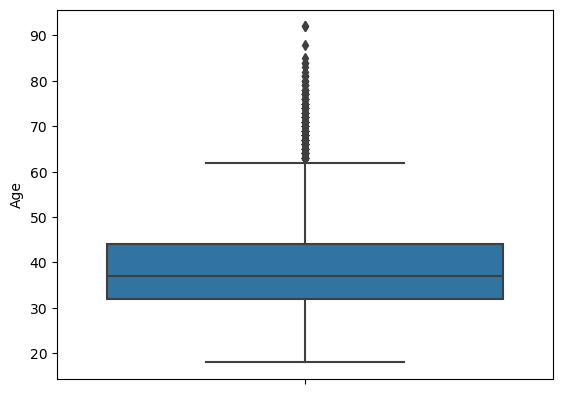

In [18]:
# Checking for outliers using boxplot in 'Age' Feature
sns.boxplot(y='Age', data=df)

The minimum age is approximately 20 years
The first quartile shows that 25% of the customers fall below age 30
The median age is slightly above 35 years
The third quartile shows that 75% of the customers fall below age 45
The maximum age within the data falls at approximately 60 years
There are outlier points in the data.

In [19]:
# Use IQR to find lower and upper limit
Age_q1 = np.quantile(df['Age'], 0.25)
Age_q3 = np.quantile(df['Age'], 0.75)
Age_IQR = Age_q3-Age_q1
Age_IQR

12.0

In [20]:
Age_lower_limit = Age_q1 - 1.5*Age_IQR
Age_upper_limit = Age_q3 + 1.5*Age_IQR
print(Age_lower_limit,Age_upper_limit)

14.0 62.0


In [21]:
# Use these limits to remove instances (rows)
Age_index_list = df.index[ (df['Age'] < Age_lower_limit) | (df['Age'] > Age_upper_limit) ]
print(Age_index_list)
print("Before", df.shape)
df = df.drop(Age_index_list)
print("After", df.shape)

Index([  58,   85,  104,  158,  181,  230,  234,  243,  252,  310,
       ...
       9688, 9733, 9734, 9736, 9747, 9753, 9765, 9832, 9894, 9936],
      dtype='int64', length=359)
Before (10000, 14)
After (9641, 14)


Outliers in 'Age' Feature successfully removed.

<Axes: ylabel='CreditScore'>

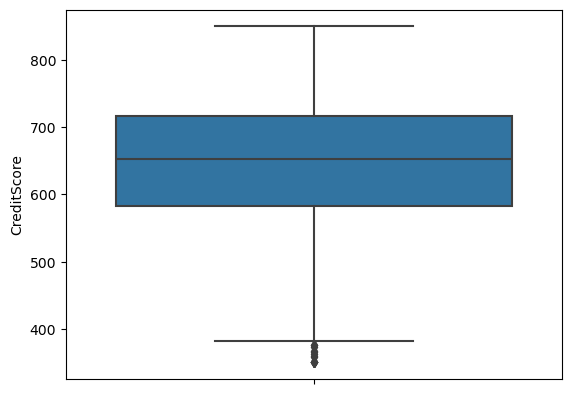

In [22]:
# Checking for outliers using boxplot in 'CreditScore' Feature
sns.boxplot(y='CreditScore', data=df)

The minimum Credit Score falls slightly below 400. 
The first quartile shows that 25% of the customers have a credit score of below 600. 
The median credit score is around 650. 
The third quartile shows that 75% of the customers have a credit score of below 700. 
The maximum credit score is above 800. There are outlier points in the data.

In [23]:
# Use IQR to find lower and upper limit
CS_q1 = np.quantile(df['CreditScore'], 0.25)
CS_q3 = np.quantile(df['CreditScore'], 0.75)
CS_IQR = CS_q3-CS_q1
CS_IQR

134.0

In [24]:
CS_lower_limit = CS_q1 - 1.5*CS_IQR
CS_upper_limit = CS_q3 + 1.5*CS_IQR
print(CS_lower_limit,CS_upper_limit)

382.0 918.0


In [25]:
# Use these limits to remove instances (rows)
CS_index_list = df.index[ (df['CreditScore'] < CS_lower_limit) | (df['CreditScore'] > CS_upper_limit) ]
print(CS_index_list)
print("Before", df.shape)
df = df.drop(CS_index_list)
print("After", df.shape)

Index([7, 942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723, 8762,
       9356, 9624],
      dtype='int64')
Before (9641, 14)
After (9627, 14)


Outliers in 'CreditSCore' Feature successfully removed.

<Axes: ylabel='EstimatedSalary'>

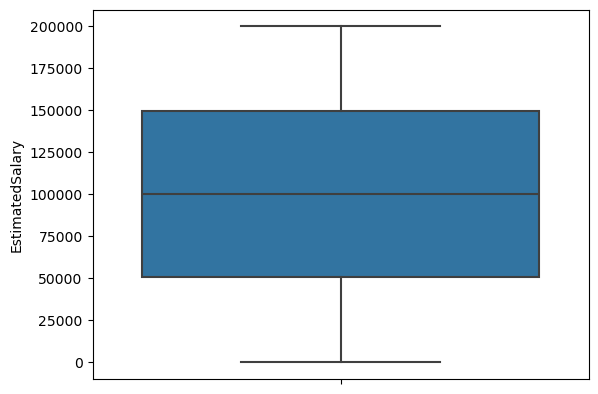

In [26]:
# Checking for outliers using boxplot in 'EstimatedSalary' Feature
sns.boxplot(y='EstimatedSalary', data=df)

The minimum estimated salary is zero. 
The first quartile shows that 25% of the customers have an estimated salary of below 50000. 
The median estimated salary is 100,000. 
The third quartile shows that 75% of the customers have an estimated salary of below 150,000. 
The maximum estimated salary is 200,000. 
There are no outlier points in the data.

<Axes: ylabel='Balance'>

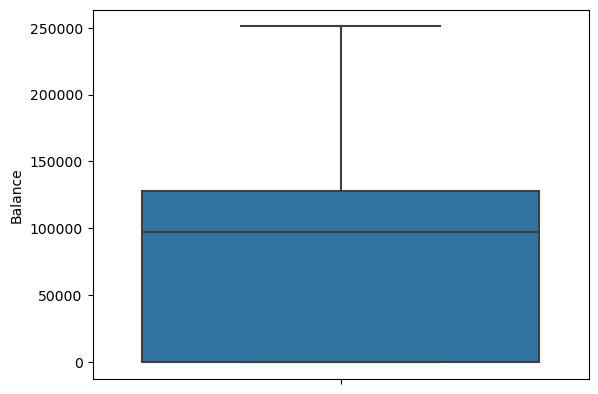

In [27]:
# Checking for outliers using boxplot in 'Balance' Feature
sns.boxplot(y='Balance', data=df)

The first quartile shows that 25% of the customers have a balance of below zero. 
The median balance is 100,000. 
The third quartile shows that 75% of the customers have a balance of below 125,000. 
The maximum balance is 200,000. 
There are no outlier points in the data.

# Section 2 c.

# Countplot for categorical features

C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

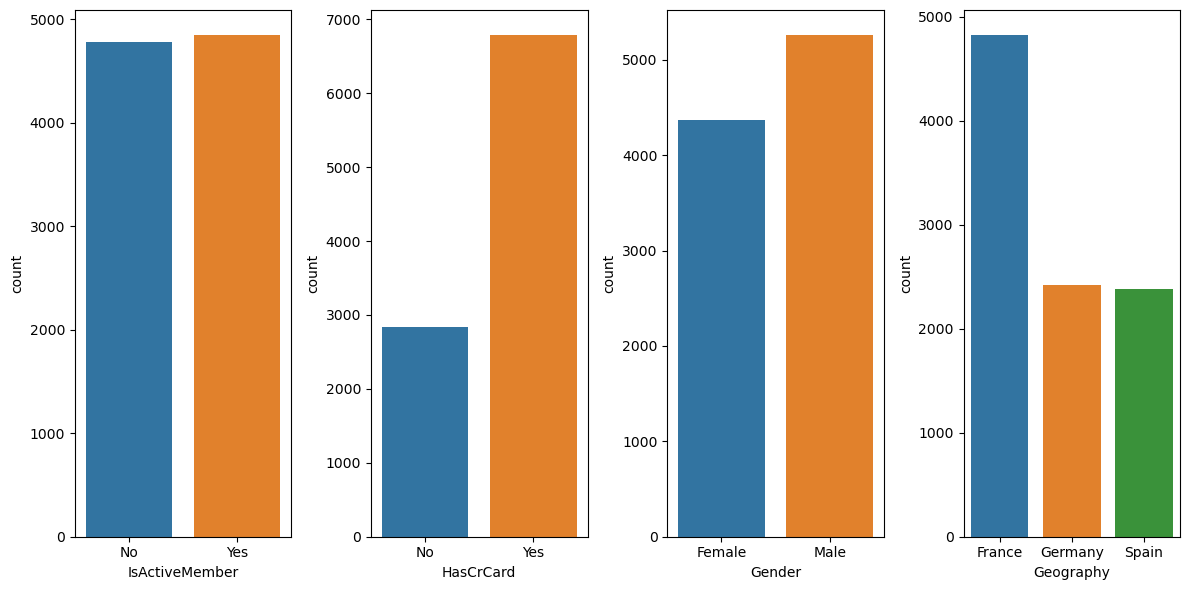

In [28]:
# Countplot for categorical features 
# assign variables and set figure size
_,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(12, 6))
# create subplots
sns.countplot( data=df,ax= ax1, x='IsActiveMember')
sns.countplot(data=df,ax= ax2, x='HasCrCard')
sns.countplot(data=df,ax= ax3, x='Gender')
sns.countplot(data=df,ax= ax4, x='Geography')
#adjust the subplots to fit within the given figure area
plt.tight_layout()
#display the figure with the subplots showing count based on different features from the dataframe
plt.show()

The number of active members is slightly higher than non active members.
The number of customers that have credit card is significantly higher than those without. 
The number of male customers is higher than that of female.
France has the highest number of customers.
Number of customers in Germany is slightly higher than those in Spain.

# Section 2 d.

# Histogram for Numerical features

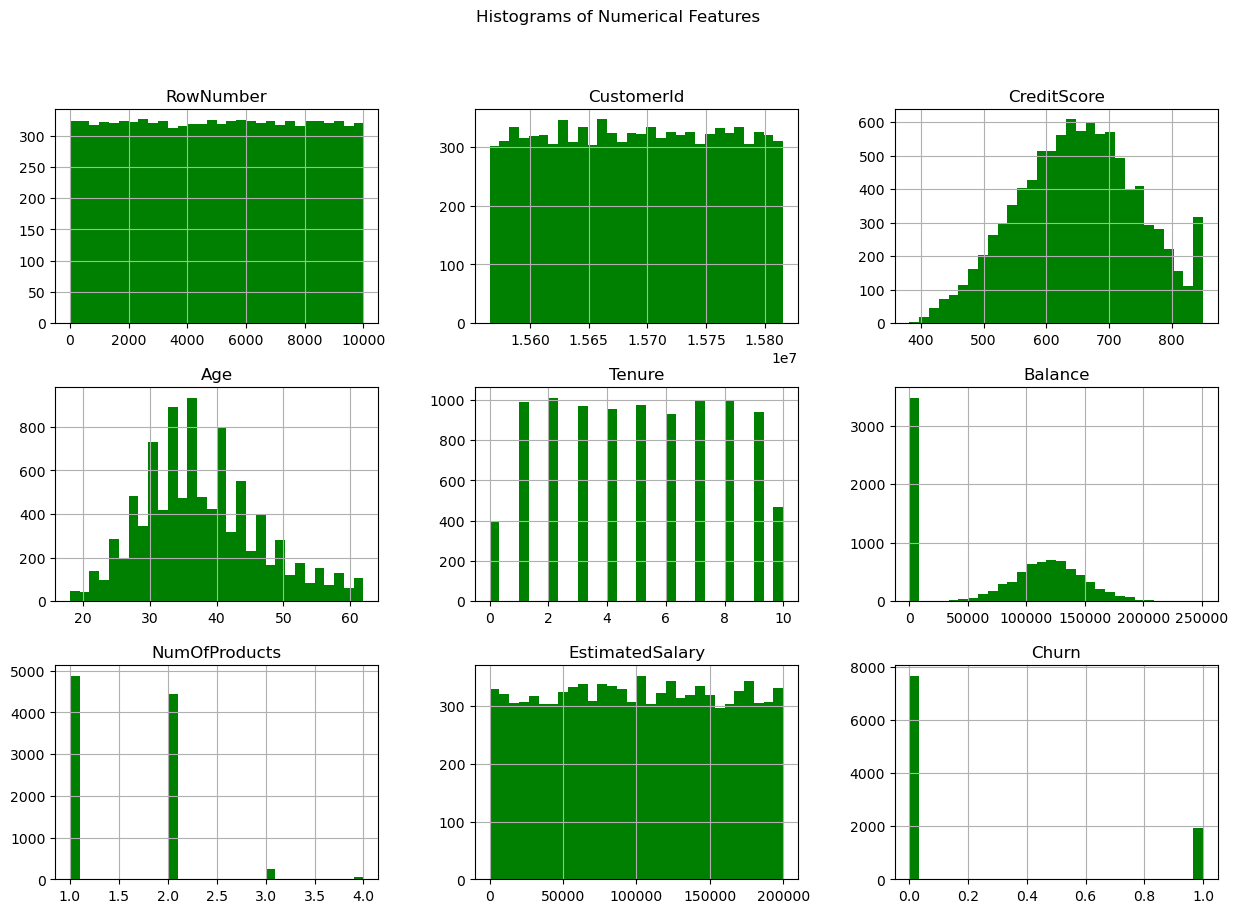

In [29]:
# Select numerical features
numeric_features = df.select_dtypes(include=[np.number]).columns
# plot histograms, specify size
df[numeric_features].hist(figsize=(15, 10), bins=30, color='green')
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [30]:
# Check for skewness
print("\nSkewness of Numeric Features (before transformation):")
skewness = df[numeric_features].skew()
print(skewness)


Skewness of Numeric Features (before transformation):
RowNumber         -0.000376
CustomerId        -0.001508
CreditScore       -0.046587
Age                0.490903
Tenure             0.008865
Balance           -0.141304
NumOfProducts      0.740233
EstimatedSalary   -0.000523
Churn              1.480409
dtype: float64


RowNumber (-0.000376): Slightly negatively skewed, indicating a slight tail to the left in the distribution.
CustomerId (-0.001508): Slightly negatively skewed, similar to RowNumber

CreditScore (-0.046587): Negatively skewed, with a slight tail to the left in the distributin.

Age (0.490903): Positively skewed, indicating a tail to the right in the distribution. The distribution is skewed towards older ges.

Tenure (0.008865): Slightly positively skewed, with a minor tail to theright.

Balance (-0.141304): Negatively skewed, showing a slight tail to the left in the distribution of alances.

NumOfProducts (0.740233): Positively skewed, indicating a tail to the right in the distribution of the number o products.

EstimatedSalary (-0.000523): Slightly negatively skewed, similar to RowNumber an CustomerId.

Churn (1.480409): Highly positively skewed, with a significant tail to the right in the distribution. This suggests that the Churn feature is heavily skewed towards one end of the values.

In [31]:
# Apply log transformation to features that are highly positively skewed (skewness > 1)
skew_threshold = 1
log_transformed_features = skewness[skewness > skew_threshold].index

for feature in log_transformed_features:
    df[feature] = np.log1p(df[feature])

# Check skewness after transformation
print("\nSkewness of Numeric Features (after transformation):")
print(df[numeric_features].skew())


Skewness of Numeric Features (after transformation):
RowNumber         -0.000376
CustomerId        -0.001508
CreditScore       -0.046587
Age                0.490903
Tenure             0.008865
Balance           -0.141304
NumOfProducts      0.740233
EstimatedSalary   -0.000523
Churn              1.480409
dtype: float64


The skewness remained the same even after transformation.

# Section 3 a.

# Joint plot with hue parameter

C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

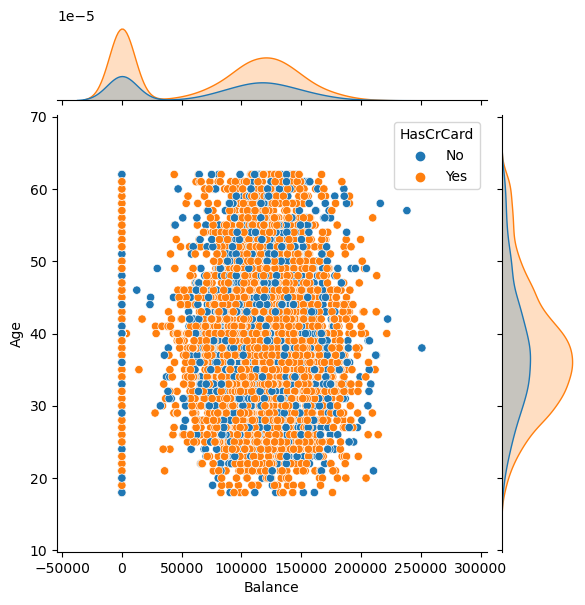

In [32]:
#joint plot with hue parameter
sns.jointplot(x= 'Balance' , y= 'Age' , data = df, hue='HasCrCard')

C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHEILA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated 

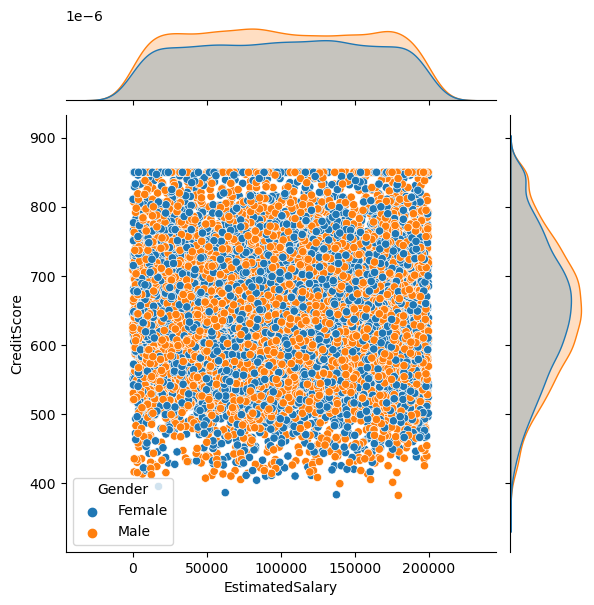

In [33]:
# Joint plot with hue parameter
sns.jointplot(x= 'EstimatedSalary' , y= 'CreditScore' , data = df, hue='Gender')

# Section 3 b.

# Scatterplot with hue parameter

<Axes: xlabel='Balance', ylabel='Age'>

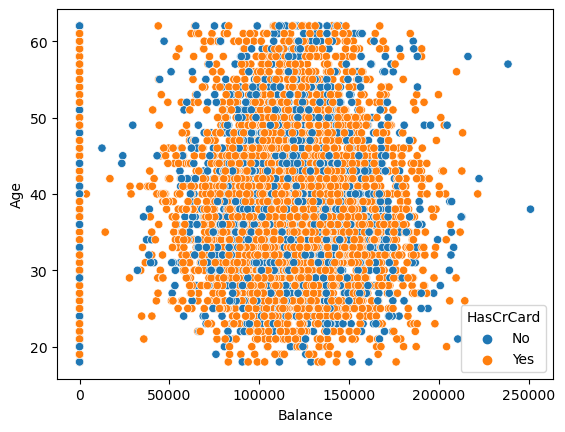

In [34]:
sns.scatterplot(x= 'Balance' , y= 'Age' , data = df, hue='HasCrCard')

<Axes: xlabel='EstimatedSalary', ylabel='CreditScore'>

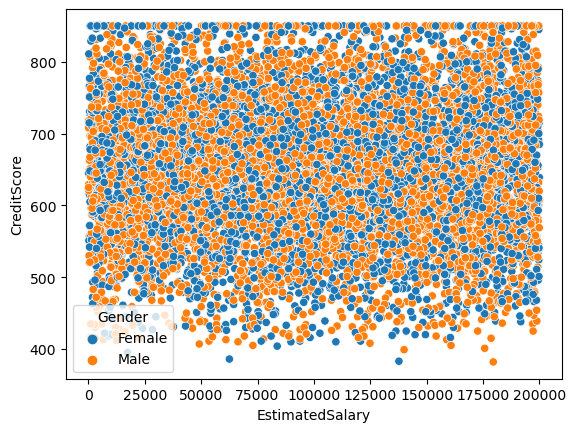

In [35]:
sns.scatterplot(x= 'EstimatedSalary' , y= 'CreditScore' , data = df, hue='Gender')

Difference between Scatter plot and Joint plot
Scatter plot displays the relationship between two numerical variables and each point on the plot represents a single data point.
Joint plot combines multiple plots to visualize the relationship between two variables. 


# Section 3 c.

# Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

This is imported in order to be used for data standardization and preprocessing before feeding it to machine learning model.

In [37]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Get the mean and standard deviation of each numeric column to check if transformation is successful
means = df[numeric_features].mean()
stds = df[numeric_features].std()
print("Mean of each column:")
print(means)
print("\nStandard deviation of each column:")
print(stds)

Mean of each column:
RowNumber          0.000000e+00
CustomerId         1.177079e-14
CreditScore        4.819616e-16
Age                3.022408e-16
Tenure             6.642656e-17
Balance            2.623849e-16
NumOfProducts     -1.549953e-16
EstimatedSalary    2.546351e-16
Churn              0.000000e+00
dtype: float64

Standard deviation of each column:
RowNumber          1.000052
CustomerId         1.000052
CreditScore        1.000052
Age                1.000052
Tenure             1.000052
Balance            1.000052
NumOfProducts      1.000052
EstimatedSalary    1.000052
Churn              1.000052
dtype: float64


The results above show that transformation has successfully standadized the numeric columns, centering them around a mean of close to 0 and scaling them to have a standard deviation of close to 1.

# Section 3 d.

# Data Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

This allows me to access the LabelEncoder so as to be able to use it to preprocess categorical data.

In [39]:
# Select non-numeric features
categorical_features = df.select_dtypes(include=['category']).columns
# initialize dictionary to store LabelEncoder objects for each categorical feature
label_encoders = {}
# transform values to numeric labels
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Verify final DataFrame structure after encoding
print("\nData Info after Encoding with LabelEncoder:")
df.info()


Data Info after Encoding with LabelEncoder:
<class 'pandas.core.frame.DataFrame'>
Index: 9627 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9627 non-null   float64
 1   CustomerId       9627 non-null   float64
 2   Surname          9627 non-null   int32  
 3   CreditScore      9627 non-null   float64
 4   Geography        9627 non-null   int32  
 5   Gender           9627 non-null   int32  
 6   Age              9627 non-null   float64
 7   Tenure           9627 non-null   float64
 8   Balance          9627 non-null   float64
 9   NumOfProducts    9627 non-null   float64
 10  EstimatedSalary  9627 non-null   float64
 11  HasCrCard        9627 non-null   int32  
 12  IsActiveMember   9627 non-null   int32  
 13  Churn            9627 non-null   float64
dtypes: float64(9), int32(5)
memory usage: 940.1 KB


The transformation is successful.

In [40]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,-1.730633,-0.783261,1099,-0.329901,0,0,0.479327,-1.044316,-1.226614,-0.914075,0.021336,1,1,1.984168
1,-1.730286,-0.606361,1159,-0.444342,2,0,0.365664,-1.390538,0.116511,-0.914075,0.215937,0,1,-0.503990
2,-1.729940,-0.996198,2000,-1.547136,0,0,0.479327,1.033013,1.332148,2.529401,0.240084,1,0,1.984168
3,-1.729594,0.145877,285,0.502395,0,0,0.138339,-1.390538,-1.226614,0.807663,-0.109438,0,0,-0.503990
4,-1.729247,0.654403,1787,2.073356,2,0,0.592990,-1.044316,0.784853,-0.914075,-0.365734,1,1,-0.503990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.731031,-1.178193,1959,1.251463,0,1,0.138339,-0.005651,-1.226614,0.807663,-0.066949,1,0,-0.503990
9996,1.731377,-1.683977,1316,-1.401484,0,1,-0.316312,1.725456,-0.307195,-0.914075,0.027436,1,1,-0.503990
9997,1.731724,-1.480199,1542,0.606432,0,0,-0.202650,0.686792,-1.226614,-0.914075,-1.008949,0,1,1.984168
9998,1.732070,-0.118575,2295,1.261866,1,1,0.479327,-0.698094,-0.023439,0.807663,-0.125746,1,0,1.984168


Data frame update is successful.

# Section 4

# Correlation Matrix

In [51]:
# Drop columns that might give misleading results
new_df = df.drop(columns=['Surname', 'RowNumber', 'CustomerId'])

# Compute correlation matrix after dropping the columns
corr_matrix = new_df.corr()
print(corr_matrix)

                 CreditScore  Geography    Gender       Age    Tenure  \
CreditScore         1.000000   0.009826 -0.004274 -0.012991 -0.000292   
Geography           0.009826   1.000000  0.003328  0.028595  0.002779   
Gender             -0.004274   0.003328  1.000000 -0.030718  0.014390   
Age                -0.012991   0.028595 -0.030718  1.000000 -0.010538   
Tenure             -0.000292   0.002779  0.014390 -0.010538  1.000000   
Balance             0.007582   0.066852  0.010347  0.041434 -0.012699   
NumOfProducts       0.011814   0.005317 -0.021201 -0.032452  0.015211   
EstimatedSalary     0.002206  -0.004485 -0.007114 -0.005630  0.009782   
HasCrCard          -0.001101  -0.011176  0.006599 -0.016376  0.019658   
IsActiveMember      0.020118   0.008482  0.021972  0.017816 -0.027409   
Churn              -0.016979   0.034517 -0.106548  0.358378 -0.013227   

                  Balance  NumOfProducts  EstimatedSalary  HasCrCard  \
CreditScore      0.007582       0.011814         0.

# Heatmap

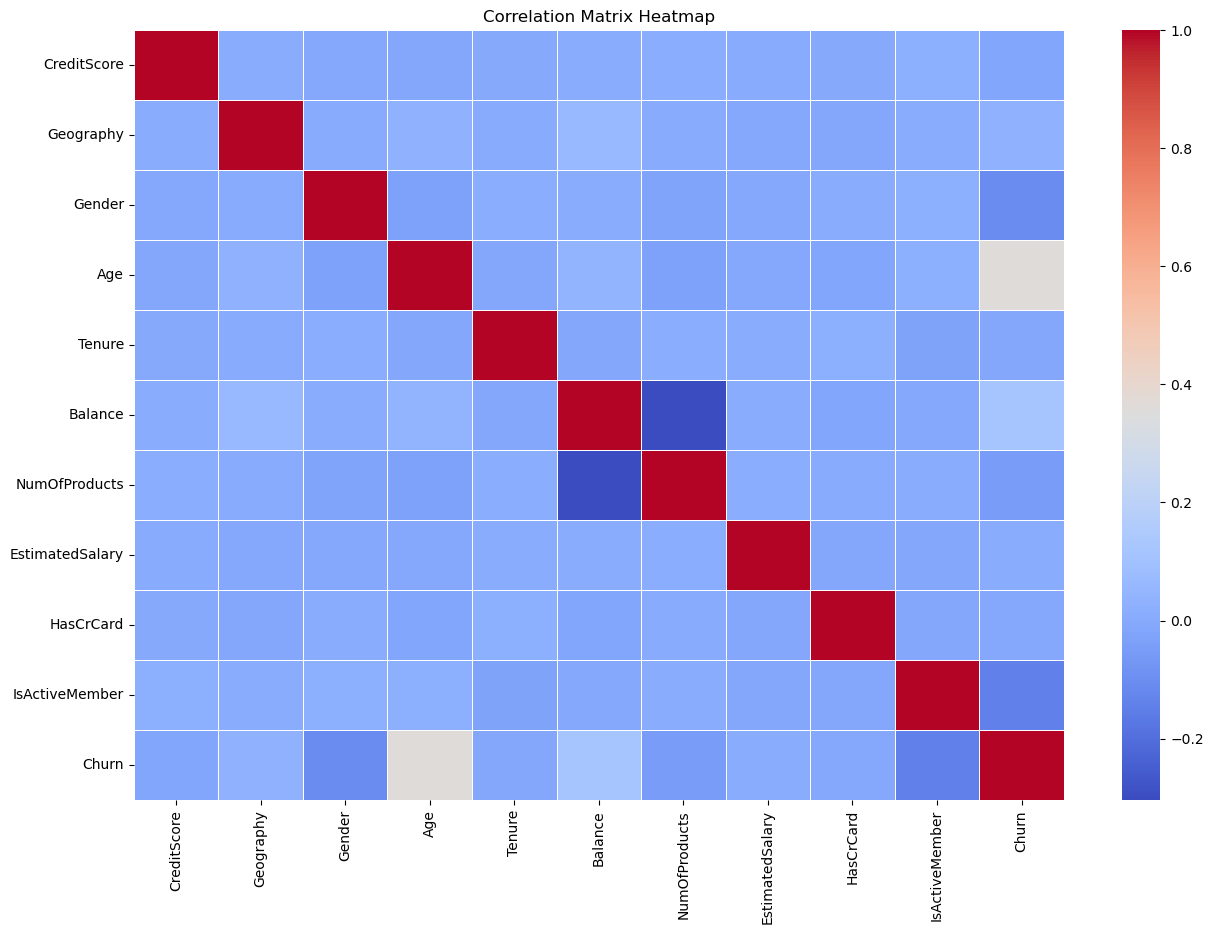

In [53]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

The cells that are dark red indicate a perfect correlation of 1, as each variable perfectly correlates with itself.
Significant positive correlations are evident in certain cells, and negative correlations in others, based on the color coding.

# Correlation with Churn variable

In [43]:
# Finding correlations with the dependent variable 'Churn'
correlations = new_df.drop(columns=['Churn']).apply(lambda x: x.corr(new_df['Churn']))
# Display the correlation coefficients
print("Correlation with Churn:\n", correlations)

Correlation with Churn:
 CreditScore       -0.016979
Geography          0.034517
Gender            -0.106548
Age                0.358378
Tenure            -0.013227
Balance            0.116627
NumOfProducts     -0.050845
EstimatedSalary    0.009405
HasCrCard         -0.008355
IsActiveMember    -0.143182
dtype: float64


In [44]:
# Select the 5 most important independent features based on correlation
top5_features = correlations.abs().nlargest(5).index

print("Top 5 most important independent features:")
print(top5_features)

Top 5 most important independent features:
Index(['Age', 'IsActiveMember', 'Balance', 'Gender', 'NumOfProducts'], dtype='object')


These features: Age, IsActiveMember, Balance, Gender and NumOfProducts are more influential in predicting the 'Churn' outcome based on the correlation analysis.

# Section 5

# Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

Importing the necessary modules from the scikit-learn library is essential for performing feature selection and splitting the dataset into training and testing sets.

In [46]:
# Separate the dataset into features (X) and target variable (y)
X = new_df.drop(columns=['Churn'])
y = new_df['Churn']
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#Display the shapes of the training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#Display first 5 rows of the features and target variable in each set
print(X.head(5))
print(X_train.head(5))
print(X_test.head(5))
print(y_test)

(7701, 10)
(1926, 10)
(7701,)
(1926,)
   CreditScore  Geography  Gender       Age    Tenure   Balance  \
0    -0.329901          0       0  0.479327 -1.044316 -1.226614   
1    -0.444342          2       0  0.365664 -1.390538  0.116511   
2    -1.547136          0       0  0.479327  1.033013  1.332148   
3     0.502395          0       0  0.138339 -1.390538 -1.226614   
4     2.073356          2       0  0.592990 -1.044316  0.784853   

   NumOfProducts  EstimatedSalary  HasCrCard  IsActiveMember  
0      -0.914075         0.021336          1               1  
1      -0.914075         0.215937          0               1  
2       2.529401         0.240084          1               0  
3       0.807663        -0.109438          0               0  
4      -0.914075        -0.365734          1               1  
      CreditScore  Geography  Gender       Age    Tenure   Balance  \
467      1.719629          1       0  0.024676 -0.005651  0.870880   
7553     0.710470          2       0 -0.3

In [47]:
#Check class distribution of target variables
#print the count of each unique value in the target variables 
print(y_train.value_counts())
print(y_test.value_counts())

Churn
-0.503990    6123
 1.984168    1578
Name: count, dtype: int64
Churn
-0.503990    1554
 1.984168     372
Name: count, dtype: int64


In [48]:
# Apply SelectKBest feature selection method to reduce the dataset size to 5 features
#create a SelectKBest object with the f_classif scoring function, which is a statistical test for the analysis of variance (ANOVA) used for classification tasks.
#The k=5 parameter specifies that the top 5 features will be selected based on their scores.
selector = SelectKBest(score_func=f_classif, k=5)
#select the most relevant features based on their scores
X_train_selected = selector.fit_transform(X_train, y_train)
#retrieve the names of the selected features from the original features X
selected_features = X.columns[selector.get_support()]
print("Selected top 5 features:")
print(selected_features)

Selected top 5 features:
Index(['Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember'], dtype='object')


These features: Age, Balance, NumOfProducts, IsActiveMember and Gender are considered the most important for predicting the 'Churn' variable while reducing the dataset size to only 5 features.

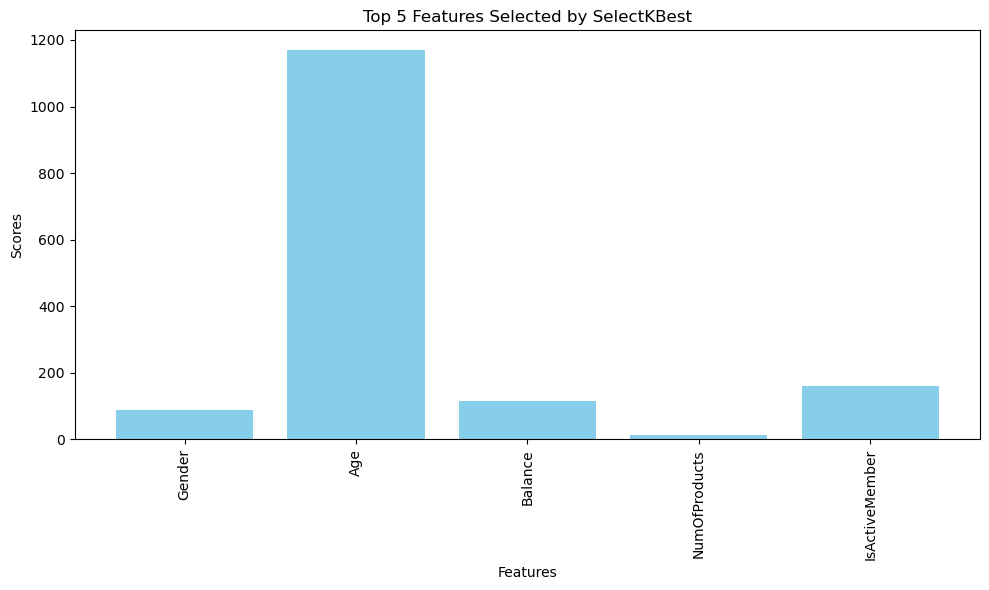

In [49]:
# Retrieve selected feature names
selected_features = X.columns[selector.get_support()]
# Get the scores of the selected features
selected_scores = selector.scores_[selector.get_support()]

# Create a pandas DataFrame for easier plotting
feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Top 5 Features Selected by SelectKBest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()